# Image classifier

In [1]:
# Data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Set the validation split
)

# Flow training images in batches with validation split
train_generator = train_datagen.flow_from_directory(
    '../../images',
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    subset='training'
)

# Flow validation images in batches
validation_generator = train_datagen.flow_from_directory(
    '../../images',
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    subset='validation'

Found 64 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


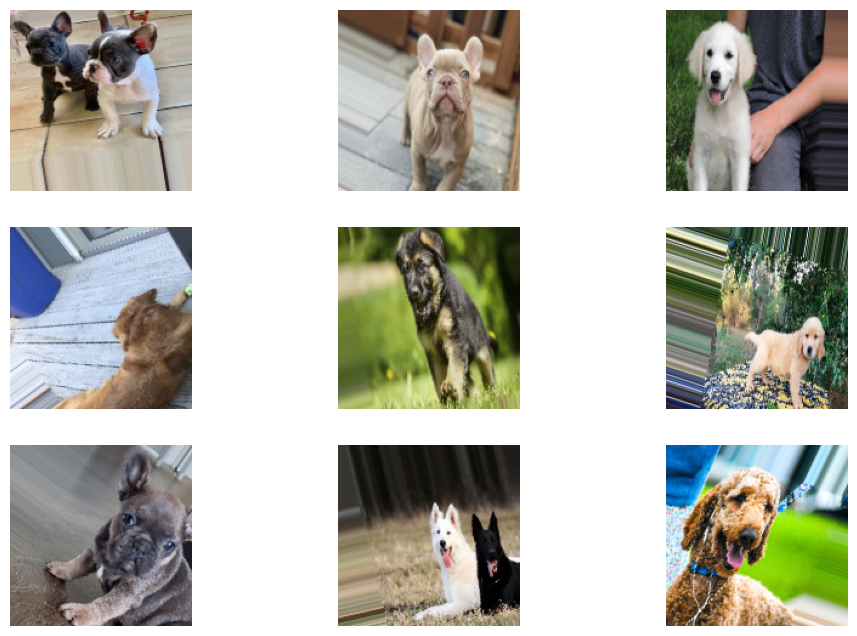

In [2]:
# Check augmented images

import matplotlib.pyplot as plt

images, labels = next(train_generator)

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

In [3]:
# Dropout

from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

# Add dropout
x = layers.Dropout(0.5)(x)

output = layers.Dense(4, activation='softmax')(x)

model = Model(inputs=img_input, outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Retrain model

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/15
100/100 - 2s - 20ms/step - accuracy: 0.4531 - loss: 1.2314 - val_accuracy: 0.2500 - val_loss: 1.5916
Epoch 2/15
100/100 - 2s - 18ms/step - accuracy: 0.4531 - loss: 1.1708 - val_accuracy: 0.3125 - val_loss: 1.4540
Epoch 3/15
100/100 - 2s - 16ms/step - accuracy: 0.5000 - loss: 1.2053 - val_accuracy: 0.1875 - val_loss: 1.7678
Epoch 4/15
100/100 - 2s - 17ms/step - accuracy: 0.4844 - loss: 1.1105 - val_accuracy: 0.2500 - val_loss: 1.9238
Epoch 5/15
100/100 - 2s - 17ms/step - accuracy: 0.4375 - loss: 1.2489 - val_accuracy: 0.2500 - val_loss: 1.5857
Epoch 6/15
100/100 - 2s - 17ms/step - accuracy: 0.5938 - loss: 1.0731 - val_accuracy: 0.4375 - val_loss: 1.5109
Epoch 7/15
100/100 - 2s - 17ms/step - accuracy: 0.4844 - loss: 1.0891 - val_accuracy: 0.5000 - val_loss: 1.6475
Epoch 8/15
100/100 - 2s - 16ms/step - accuracy: 0.5000 - loss: 1.0300 - val_accuracy: 0.3125 - val_loss: 1.7078
Epoch 9/15
100/100 - 2s - 16ms/step - accuracy: 0.4531 - loss: 1.1167 - val_accuracy: 0.4375 - val_loss:

In [11]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 

print("Loss: ",accuracy_score[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.3125 - loss: 2.2678
[2.2677676677703857, 0.3125]
Accuracy: 31.2500%
Loss:  2.2677676677703857


In [5]:
def plot(training_history):
    acc = training_history.history['accuracy'] 
    val_acc = training_history.history['val_accuracy']
    loss = training_history.history['loss'] 
    val_loss = training_history.history['val_loss']
    epochs = range(len(acc))


    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot training and validation loss
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

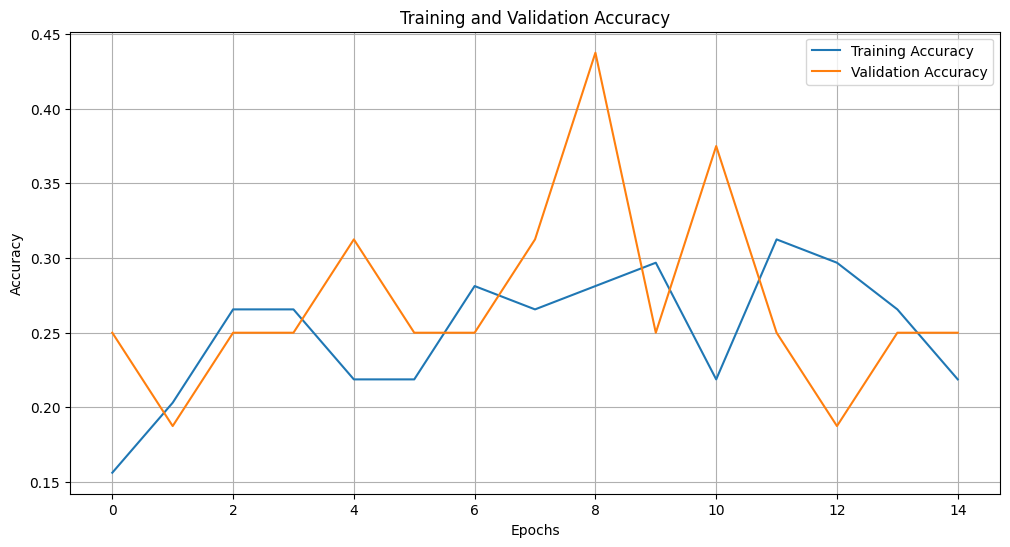

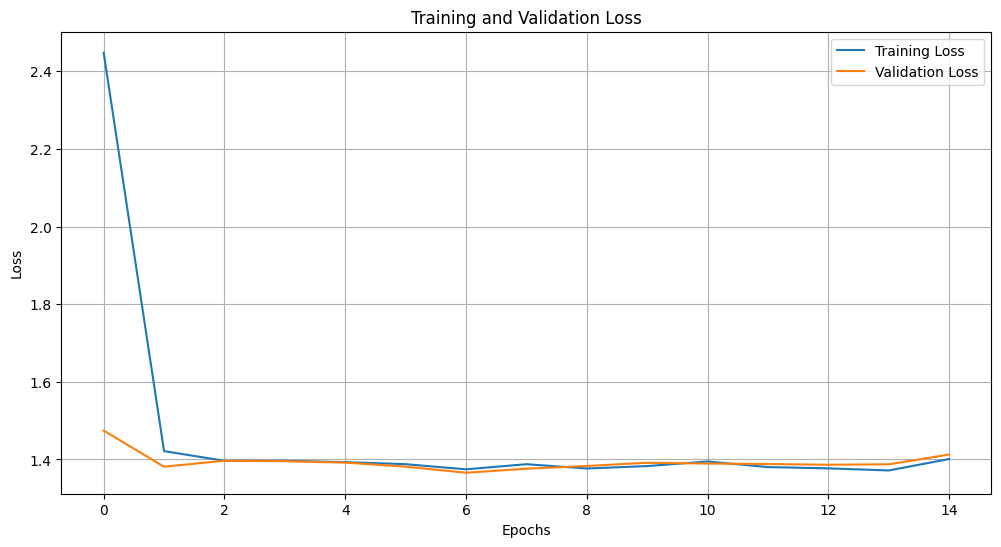

In [6]:
plot(history)

In [7]:
# Add more epochs

# Retrain model
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/25
100/100 - 2s - 22ms/step - accuracy: 0.3594 - loss: 1.3512 - val_accuracy: 0.1875 - val_loss: 1.3894
Epoch 2/25


2024-09-22 23:28:43.391309: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 - 2s - 21ms/step - accuracy: 0.3594 - loss: 1.3470 - val_accuracy: 0.1875 - val_loss: 1.4009
Epoch 3/25
100/100 - 2s - 18ms/step - accuracy: 0.4062 - loss: 1.3170 - val_accuracy: 0.4375 - val_loss: 1.4032
Epoch 4/25
100/100 - 2s - 16ms/step - accuracy: 0.3281 - loss: 1.3742 - val_accuracy: 0.5000 - val_loss: 1.3660
Epoch 5/25
100/100 - 2s - 17ms/step - accuracy: 0.3750 - loss: 1.3138 - val_accuracy: 0.3125 - val_loss: 1.4172
Epoch 6/25
100/100 - 2s - 17ms/step - accuracy: 0.3906 - loss: 1.3076 - val_accuracy: 0.2500 - val_loss: 1.4604
Epoch 7/25
100/100 - 2s - 18ms/step - accuracy: 0.3281 - loss: 1.3163 - val_accuracy: 0.1875 - val_loss: 1.4148
Epoch 8/25
100/100 - 2s - 17ms/step - accuracy: 0.3594 - loss: 1.2780 - val_accuracy: 0.3750 - val_loss: 1.5019
Epoch 9/25
100/100 - 2s - 18ms/step - accuracy: 0.3750 - loss: 1.2757 - val_accuracy: 0.1875 - val_loss: 1.5839
Epoch 10/25
100/100 - 2s - 19ms/step - accuracy: 0.4062 - loss: 1.2307 - val_accuracy: 0.5000 - val_loss: 1.4144
Ep

2024-09-22 23:29:11.582586: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 - 2s - 17ms/step - accuracy: 0.4531 - loss: 1.1765 - val_accuracy: 0.5000 - val_loss: 1.5917
Epoch 19/25
100/100 - 2s - 17ms/step - accuracy: 0.4375 - loss: 1.3731 - val_accuracy: 0.3750 - val_loss: 1.5553
Epoch 20/25
100/100 - 2s - 18ms/step - accuracy: 0.4219 - loss: 1.1826 - val_accuracy: 0.3125 - val_loss: 1.5476
Epoch 21/25
100/100 - 2s - 17ms/step - accuracy: 0.4062 - loss: 1.1990 - val_accuracy: 0.3125 - val_loss: 1.3603
Epoch 22/25
100/100 - 2s - 17ms/step - accuracy: 0.5000 - loss: 1.1304 - val_accuracy: 0.3750 - val_loss: 1.6528
Epoch 23/25
100/100 - 2s - 16ms/step - accuracy: 0.4844 - loss: 1.2044 - val_accuracy: 0.3750 - val_loss: 2.0395
Epoch 24/25
100/100 - 2s - 16ms/step - accuracy: 0.3281 - loss: 1.2329 - val_accuracy: 0.4375 - val_loss: 1.9050
Epoch 25/25
100/100 - 2s - 17ms/step - accuracy: 0.4844 - loss: 1.2433 - val_accuracy: 0.3125 - val_loss: 1.6451


In [9]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 

print("Loss: ",accuracy_score[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.2500 - loss: 1.7637
[1.7637296915054321, 0.25]
Accuracy: 25.0000%
Loss:  1.7637296915054321


In [ ]:
plot(history)

In [12]:
# Change data augmentation (add more shift and rotation range)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '../../images',
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '../../images',
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    subset='validation'
)

Found 64 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/15
100/100 - 2s - 22ms/step - accuracy: 0.5312 - loss: 1.0050 - val_accuracy: 0.1875 - val_loss: 1.8504
Epoch 2/15
100/100 - 2s - 18ms/step - accuracy: 0.5781 - loss: 1.0002 - val_accuracy: 0.3750 - val_loss: 2.0145
Epoch 3/15
100/100 - 2s - 18ms/step - accuracy: 0.4844 - loss: 1.0606 - val_accuracy: 0.1875 - val_loss: 1.8545
Epoch 4/15
100/100 - 2s - 17ms/step - accuracy: 0.5000 - loss: 1.0821 - val_accuracy: 0.3125 - val_loss: 1.3785
Epoch 5/15
100/100 - 2s - 17ms/step - accuracy: 0.5312 - loss: 1.0433 - val_accuracy: 0.2500 - val_loss: 1.7800
Epoch 6/15
100/100 - 2s - 16ms/step - accuracy: 0.5312 - loss: 1.0847 - val_accuracy: 0.2500 - val_loss: 1.8358
Epoch 7/15
100/100 - 2s - 17ms/step - accuracy: 0.5156 - loss: 1.0800 - val_accuracy: 0.1250 - val_loss: 2.0298
Epoch 8/15
100/100 - 2s - 16ms/step - accuracy: 0.4375 - loss: 1.1539 - val_accuracy: 0.3125 - val_loss: 1.8584
Epoch 9/15
100/100 - 2s - 18ms/step - accuracy: 0.5938 - loss: 1.1094 - val_accuracy: 0.2500 - val_loss:

2024-09-22 23:30:46.872432: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 - 2s - 16ms/step - accuracy: 0.5469 - loss: 1.1425 - val_accuracy: 0.2500 - val_loss: 1.7014
Epoch 11/15
100/100 - 2s - 16ms/step - accuracy: 0.5625 - loss: 1.0558 - val_accuracy: 0.1875 - val_loss: 1.6203
Epoch 12/15
100/100 - 2s - 17ms/step - accuracy: 0.5625 - loss: 1.1126 - val_accuracy: 0.2500 - val_loss: 1.4599
Epoch 13/15
100/100 - 2s - 16ms/step - accuracy: 0.6094 - loss: 1.0124 - val_accuracy: 0.3125 - val_loss: 1.5674
Epoch 14/15
100/100 - 2s - 16ms/step - accuracy: 0.6250 - loss: 1.0014 - val_accuracy: 0.1875 - val_loss: 1.6544
Epoch 15/15
100/100 - 2s - 16ms/step - accuracy: 0.4688 - loss: 1.0504 - val_accuracy: 0.4375 - val_loss: 1.7031


In [14]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 

print("Loss: ",accuracy_score[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.1875 - loss: 2.0970
[2.0969858169555664, 0.1875]
Accuracy: 18.7500%
Loss:  2.0969858169555664


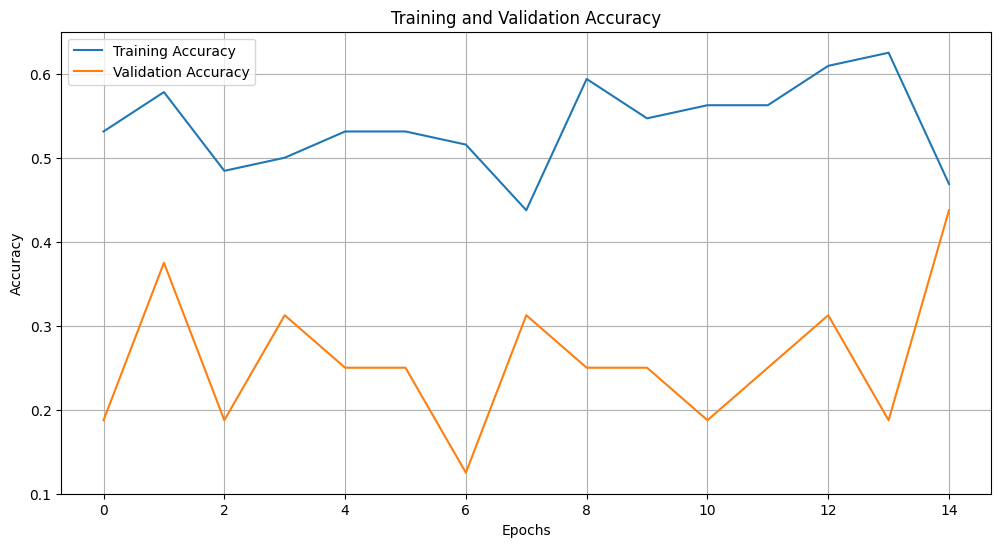

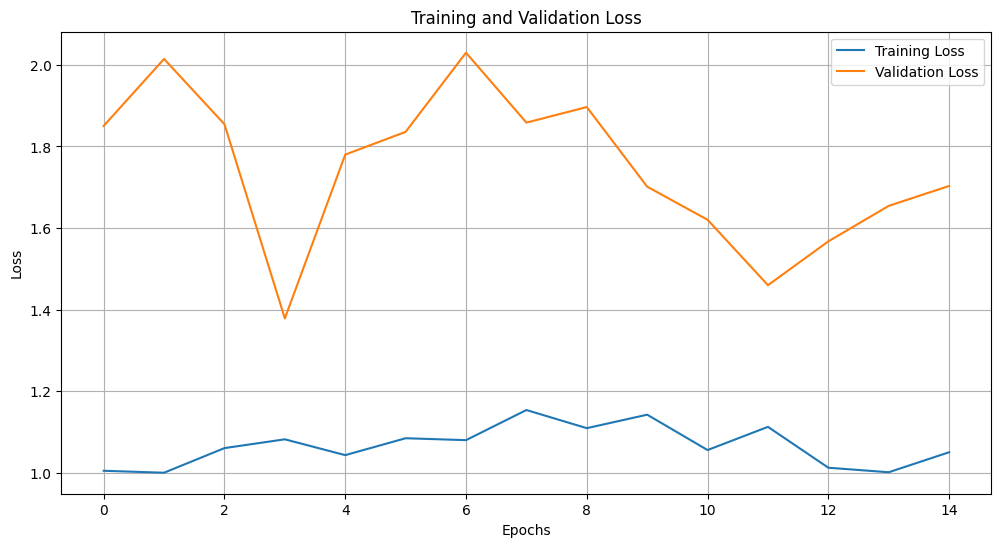

In [15]:
plot(history)

In [16]:
# Change data augmentation (Just do horizontal flip)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '../../images',
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '../../images',
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    subset='validation'
)

Found 64 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


In [17]:
history = model.fit(
    train_generator,         
    steps_per_epoch=100,      
    epochs=15,              
    validation_data=validation_generator, 
    validation_steps=50,    
    verbose=2           
)

Epoch 1/15
100/100 - 2s - 20ms/step - accuracy: 0.6562 - loss: 0.7602 - val_accuracy: 0.2500 - val_loss: 2.0652
Epoch 2/15
100/100 - 2s - 17ms/step - accuracy: 0.6719 - loss: 0.7233 - val_accuracy: 0.3125 - val_loss: 2.2334
Epoch 3/15
100/100 - 2s - 16ms/step - accuracy: 0.7031 - loss: 0.7445 - val_accuracy: 0.4375 - val_loss: 2.3410
Epoch 4/15
100/100 - 1s - 15ms/step - accuracy: 0.7500 - loss: 0.6384 - val_accuracy: 0.2500 - val_loss: 2.3449
Epoch 5/15
100/100 - 2s - 16ms/step - accuracy: 0.7031 - loss: 0.5947 - val_accuracy: 0.2500 - val_loss: 2.5215
Epoch 6/15
100/100 - 1s - 15ms/step - accuracy: 0.8125 - loss: 0.4734 - val_accuracy: 0.2500 - val_loss: 3.0340
Epoch 7/15
100/100 - 1s - 15ms/step - accuracy: 0.8125 - loss: 0.4985 - val_accuracy: 0.3750 - val_loss: 3.0567
Epoch 8/15
100/100 - 2s - 16ms/step - accuracy: 0.8438 - loss: 0.4184 - val_accuracy: 0.2500 - val_loss: 3.0293
Epoch 9/15
100/100 - 2s - 16ms/step - accuracy: 0.8281 - loss: 0.4040 - val_accuracy: 0.2500 - val_loss:

In [18]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 

print("Loss: ",accuracy_score[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.3125 - loss: 3.1596
[3.1595849990844727, 0.3125]
Accuracy: 31.2500%
Loss:  3.1595849990844727


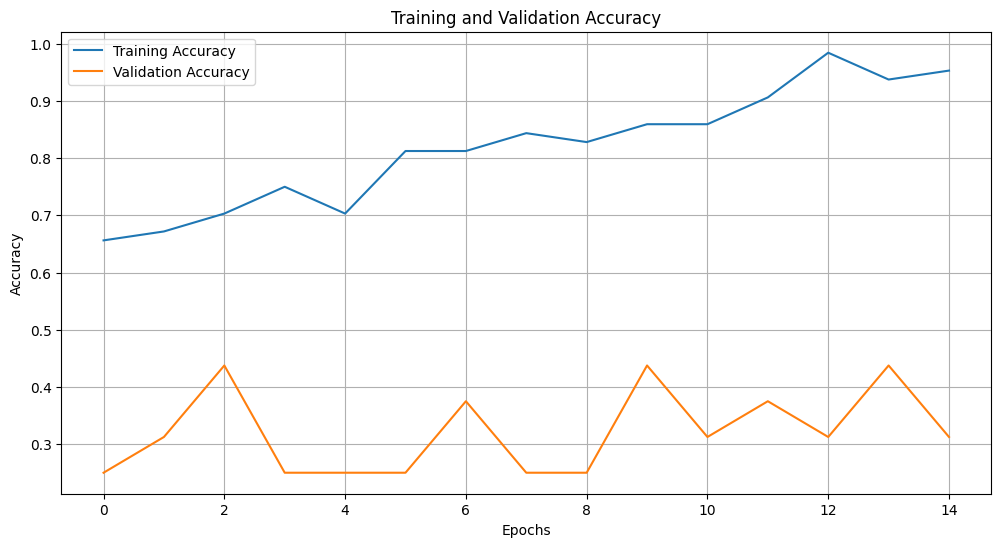

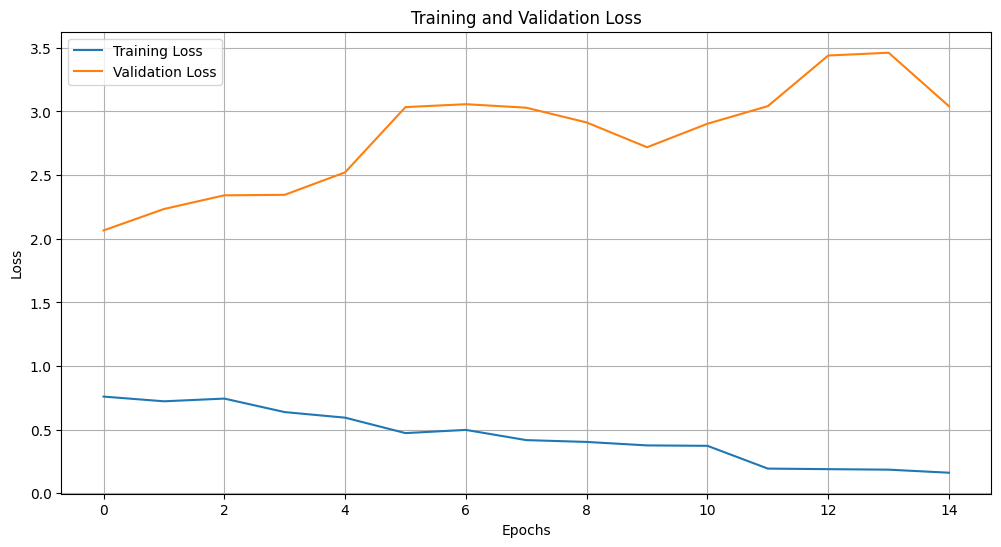

In [19]:
plot(history)